# developing the newton cooling function

$$\frac{\partial T}{\partial t}=k\frac{\partial^{2}T}{\partial x^{2}}$$

$$\lim_{dt\rightarrow0}\frac{T\left(t+dt,x\right)-T\left(t,x\right)}{dt}=k\lim_{dx\rightarrow0}\frac{T\left(x+dx,t\right)-2T\left(x,t\right),T\left(x-dx,t\right)}{dx}$$

## we will approximate
$$dt\approx0, dx\approx0$$

$$\frac{T\left(t+dt,x\right)-T\left(t,x\right)}{dt}\approx k\frac{T\left(t,x+dx\right)-2T\left(t,x\right)+T\left(t,x-dx\right)}{dx^{2}}$$

$$T\left(t+dt,x\right)\approx k\frac{\left(T\left(t,x+dx\right)-2T\left(t,x\right)+T\right)dt}{dx^{2}}+T\left(t,x\right)$$

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation


length = 5
dx=0.01
k = 0.466
t = 500
delta_t = 0.0001


def heat_equation(simulation:np.ndarray,t:int,x:int,k:float,delta_t:float)->float:
    """ 
    function that accepts the location of a point in the rod and the time and returns it's temperature
    dT/dt = k/2((T3-T2)-(T2-T1)) is the change in temperature
    and then according to euler
    T = dT/dt*delta_t+T2)
    """
    T1=simulation[t,x-1]
    T2=simulation[t,x]
    T3=simulation[t,x+1]
    derTemp = k*(((T3-T2)-(T2-T1))/dx**2) 
    return derTemp*delta_t+T2

def heat_simulation(init_conditions:np.ndarray,p_amnt:float,k:float,t:float,delta_t:float):
    """ this constructs the 1d heat simulation
    """
    simulation = np.zeros(shape=(t,p_amnt+2))
    simulation[0,1:p_amnt+1]=init_conditions
    for i in range(1,t):
        for j in range(1,p_amnt+1):
            simulation[i,j]=heat_equation(simulation,i-1,j,k,delta_t)
        simulation[i,p_amnt+1]=simulation[i,p_amnt-1]
        simulation[i,0]=simulation[i,2]
    return simulation

In [2]:
init_conditions = np.zeros(int(length/dx))
x=0
for i in range(len(init_conditions)):
    x+=0.3
    init_conditions[i]=np.sin(x)
simulation = heat_simulation(init_conditions,int(length/dx),k,t,delta_t)

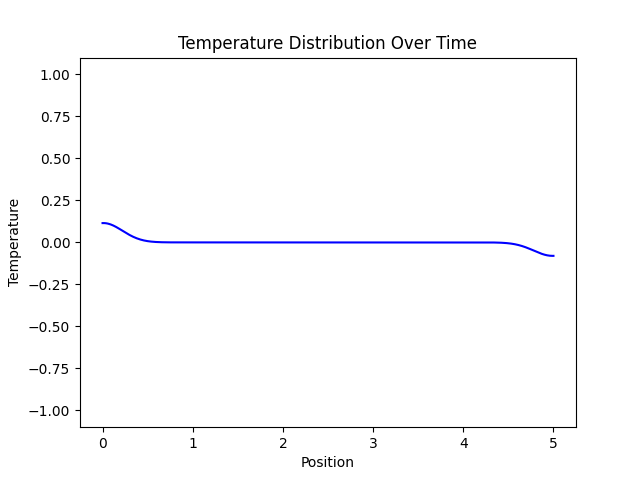

In [3]:
%matplotlib widget
# Function to update the plot for each frame of the animation
def update(frame):
    line.set_ydata(simulation[frame])
    return line,

# Initialize the plot
fig, ax = plt.subplots()
x_values = np.linspace(0, length, int(length / dx) + 2)
line, = ax.plot(x_values, simulation[0], color='blue')

# Create the animation
ani = animation.FuncAnimation(fig, update, frames=range(t), interval=5)

plt.xlabel('Position')
plt.ylabel('Temperature')
plt.title('Temperature Distribution Over Time')
#ani.save('temperature_animation.mp4', writer='ffmpeg')
